## Funnel Analysis

The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that leads to conversion is called ‘funnel’ .

Data Science can have a tremendous impact on funnel optimization.
Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience as well as it often allows to discover bugs.

In [1]:
#importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

%matplotlib inline

In [2]:
#loading the data as dataframe. 
user_page = pd.read_csv('user_table.csv')
home_page = pd.read_csv('home_page_table.csv')
search_page = pd.read_csv('search_page_table.csv')
payment_page = pd.read_csv('payment_page_table.csv')
confirmation_page = pd.read_csv('payment_confirmation_table.csv')

In [3]:
#having a brief look at the loaded dataframes. 
print(user_page.head())
print(home_page.head())
print(search_page.head())
print(payment_page.head())
print(confirmation_page.head())

   user_id        date   device     sex
0   450007  2015-02-28  Desktop  Female
1   756838  2015-01-13  Desktop    Male
2   568983  2015-04-09  Desktop    Male
3   190794  2015-02-18  Desktop  Female
4   537909  2015-01-15  Desktop    Male
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:


- The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

- From the home page, the user can perform a search and land on the search page. 

- From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

- If she does decide to buy, she ends up on the confirmation page


In [4]:
#merging the tables together into one dataframe. 
df = pd.merge(left = user_page , right = home_page, how = 'left' ,on = 'user_id')
df = pd.merge(left = df, right = search_page, how = 'left', on = 'user_id', suffixes = ('_home', '_search'))
df = pd.merge(left = df, right = payment_page, how = 'left', on = 'user_id')
df = pd.merge(left = df, right = confirmation_page, how = 'left', on = 'user_id',suffixes = ('_payment', '_confirmation'))
df.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [5]:
#Replacing the NaN values with 0 and mapping successful visits with 1. 
df = df.fillna(0)
df['page_home'] = df['page_home'].map({'home_page': 1})
df['page_search']= df['page_search'].map({'search_page': 1})
df['page_payment'] =df['page_payment'].map({'payment_page': 1})
df['page_confirmation']= df['page_confirmation'].map({'payment_confirmation_page': 1})
df.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,1,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,1,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,1,1.0,NaN,NaN
3,190794,2015-02-18,Desktop,Female,1,1.0,NaN,NaN
4,537909,2015-01-15,Desktop,Male,1,NaN,NaN,NaN


In [9]:

total_list = [['page_home',df['page_home'].sum()],['page_search',df['page_search'].sum()],['page_payment',df['page_payment'].sum()],['page_confirmation',df['page_confirmation'].sum()]]
total = pd.DataFrame(total_list, columns = ['page','sum'])
print(df)

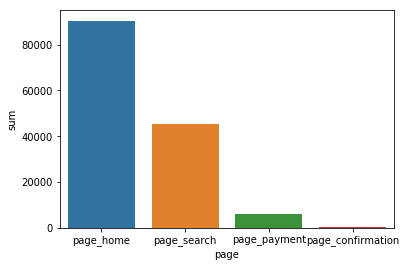

In [11]:
#Visualizing barplot for page visits.
sns.barplot(x ='page', y = 'sum', data = total)

In [12]:
#The function below shows the basic statistical makeup of a specific feature
def stat(df):
    
    '''
    INPUT: Desired Dataframe
    OUTPUT: Dataframe and plot that contains the mean of the conversion of the Input
    '''
    pages = df[['page_home','page_search','page_payment','page_confirmation']]
    mean = []
    for i in pages: 
        mean.append([i,df[i].mean()])
    mean = pd.DataFrame(mean,columns =['page','mean'])

    print(mean)
    
    #plotting the graph of funnel analysis based on the feature
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x = 'page', y = 'mean', data = mean)
    ax.set_xlabel('Page', fontsize=12)
    ax.set_ylabel('Ratio of Visitors', fontsize=12)
    plt.show()

                page      mean
0          page_home  1.000000
1        page_search  0.500000
2       page_payment  0.066704
3  page_confirmation  0.005000


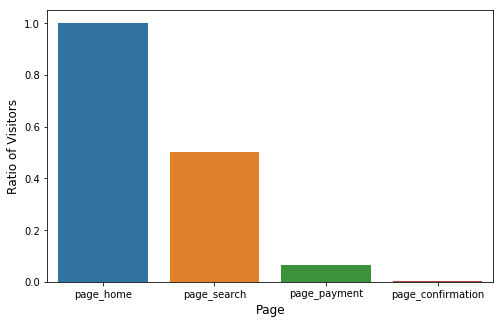

In [13]:
#Viewing descriptive statistics of 'df' DataFrame
stat(df)

In [14]:
#Finding the unique values in each feature.
for i in df[['device','sex']]:
    print (df[i].unique())

['Desktop' 'Mobile']
['Female' 'Male']


In [ ]:
#Seperating the original dataset into seperate features.
df_desktop = df[df['device']== 'Desktop']
df_mobile = df[df['device'] == 'Mobile']
df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']

                page      mean
0          page_home  1.000000
1        page_search  0.496944
2       page_payment  0.064644
3  page_confirmation  0.004655


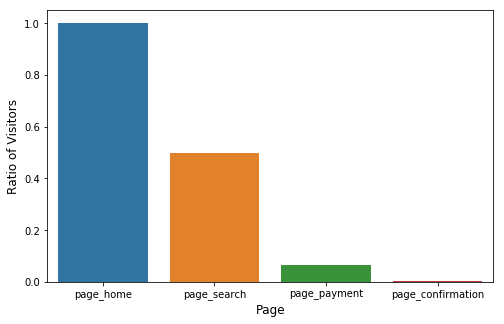

None
                page      mean
0          page_home  1.000000
1        page_search  0.503073
2       page_payment  0.068774
3  page_confirmation  0.005347


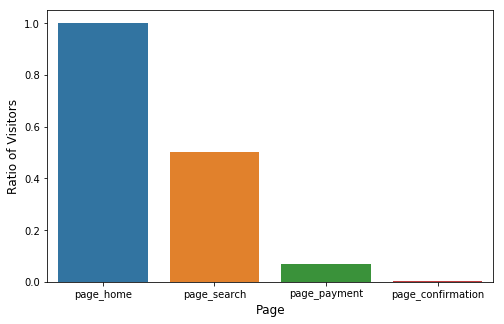

None
                page      mean
0          page_home  1.000000
1        page_search  0.500000
2       page_payment  0.050000
3  page_confirmation  0.002492


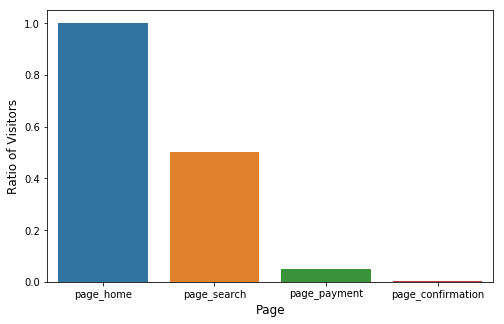

None
                page  mean
0          page_home  1.00
1        page_search  0.50
2       page_payment  0.10
3  page_confirmation  0.01


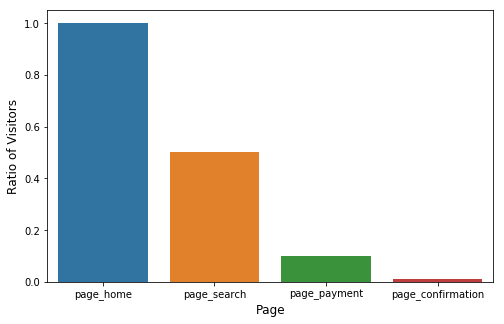

None


In [17]:
#Visualizing descriptive statisitical make up of seperate features.
print(stat(df_male))
print(stat(df_female))
print(stat(df_desktop))
print(stat(df_mobile))

The above funnel analysis shows that between the homepage and searchpage, the customers churn by 50%. This means that out of all the people that make it to the homepage only half of them will go through the searchpage. 

However, it is more surprising to note that the churn between search page and payment page is greater than half. This is where most of the customers who do make it to the searchpage, ultimately choose to not go through with the payment. This can be due to a variety of reasons. The most important cause being that the search algorithm that is implemented on the website is not effective enough. This is implied from the fact that the greater magnitude of churn indicates that the customer has not found the product that he or she desires. 

There are two main features that were explored inorder to further determine the cause of churn - sex and device. While looking at the difference between the male and female features, it turns out that difference between the churn is not that much, implying that the approach taken to target these two segments of customers is effective, since we are able to convert them, enough though it is not efficient enough. 

However, when we look at the churn of customers depending on their device, it is a different story. While one may assume that the customer churn will be lower on desktop than on mobile simply because, usage of desktop implies the customer is more serious about the purchase rather than the impulsive customer on the mobile. The data above does not support this claim, infact that customer on the mobile is more likely to purchase the product than on desktop. This implies that the payment interface on the mobile is more customer friendly than that of the desktop. 

The above analysis is not the end but rather the starting point of improving the conversion rate of the ecommerce website.